<a href="https://colab.research.google.com/github/cennetceylan19/AISummerCamp22/blob/main/Machinelearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Probleme Genel Bakış 
# 2) Veriyi Toplamak

"Study Hours" Dataset: https://www.kaggle.com/datasets/himanshunakrani/studentstudy-hours

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("score.csv") 

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# 3) Veriyi görselleştirmek

In [6]:
import matplotlib.pyplot as plt

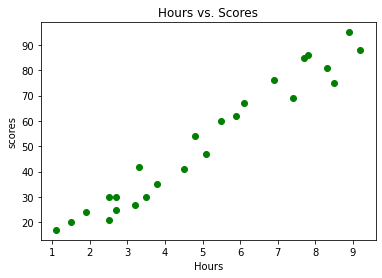

In [7]:
plt.scatter(x= df["Hours"], y = df["Scores"], color = "green")

plt.xlabel("Hours")
plt.ylabel("scores")

plt.title("Hours vs. Scores")
plt.show()

# 4)Veriyi Modele Uygun Hale Getirmek

In [8]:
x = df["Hours"]
y = df["Scores"]

In [9]:
print(x)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [10]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [11]:
import sklearn.model_selection

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.8)

In [13]:
print(x_train)

5     1.5
21    4.8
7     5.5
8     8.3
19    7.4
13    3.3
6     9.2
15    8.9
23    6.9
22    3.8
24    7.8
1     5.1
2     3.2
14    1.1
0     2.5
3     8.5
16    2.5
11    5.9
17    1.9
9     2.7
Name: Hours, dtype: float64


In [14]:
print(x_test)

20    2.7
10    7.7
12    4.5
4     3.5
18    6.1
Name: Hours, dtype: float64


In [15]:
print(y_train)

5     20
21    54
7     60
8     81
19    69
13    42
6     88
15    95
23    76
22    35
24    86
1     47
2     27
14    17
0     21
3     75
16    30
11    62
17    24
9     25
Name: Scores, dtype: int64


In [16]:
print(y_test)

20    30
10    85
12    41
4     30
18    67
Name: Scores, dtype: int64


In [17]:
 x_test.shape

(5,)

In [18]:
import numpy as np

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
type(x_train)

numpy.ndarray

In [21]:
x_test.shape

(5,)

In [22]:
#reshape matrix boyutunun değişimini sağlıyor. reshape changes dimention of matrix.  
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


# 5) Model Seçimi ve Modelin Eğitilmesi 

In [24]:
import sklearn.linear_model

In [25]:
#model oluşturma
lin_model = sklearn.linear_model.LinearRegression()

In [26]:
#linear modelin train edilmesi
lin_model.fit(x_train, y_train)

LinearRegression()

# 6) Modelin Optimize Edilmesi

In [27]:
import sklearn.metrics

In [28]:
predictions = lin_model.predict(x_test)

In [29]:
x_test[-1]

array([6.1])

In [30]:
print(predictions)

[[29.42525675]
 [77.02086198]
 [46.55967463]
 [37.04055359]
 [61.79026831]]


In [32]:
for i in range (len(x_test)): #or i in range(len(X_test)):
 print(f"{i} : Actual Value: {y_test[i]} - Predicted Value: {predictions[i]}")

0 : Actual Value: [30] - Predicted Value: [29.42525675]
1 : Actual Value: [85] - Predicted Value: [77.02086198]
2 : Actual Value: [41] - Predicted Value: [46.55967463]
3 : Actual Value: [30] - Predicted Value: [37.04055359]
4 : Actual Value: [67] - Predicted Value: [61.79026831]


In [36]:
r2 = sklearn.metrics.r2_score(y_test, predictions)
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

In [37]:
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

R2: 0.928289464120966
MAE: 5.272768235948153
MSE: 34.32353089314081


In [39]:
score_tahmin = lin_model.predict([[5]])
print(score_tahmin)

[[51.31923516]]


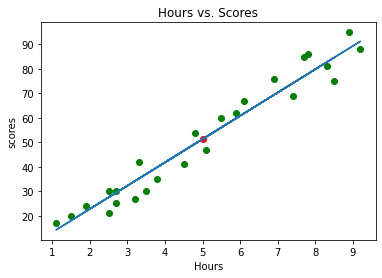

In [41]:
x_predictions = lin_model.predict(x_train)

plt.scatter(x= df["Hours"], y = df["Scores"], color = "green")
plt.plot(x_train, x_predictions)

#5 saat çalışan bir öğrencinin alacağı score tahmini nokta için:
plt.scatter(x=5, y=lin_model.predict([[5]]),color = "red")

plt.xlabel("Hours")
plt.ylabel("scores")

plt.title("Hours vs. Scores")
plt.show()